<a href="https://colab.research.google.com/github/utkarsh-prakash/Time-Series-Modelling/blob/main/Timeseries_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  61
Columns  :  3

Features : 
 ['Quarter', 'Revenue', 'Net Income']

Missing values :   Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values :  
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


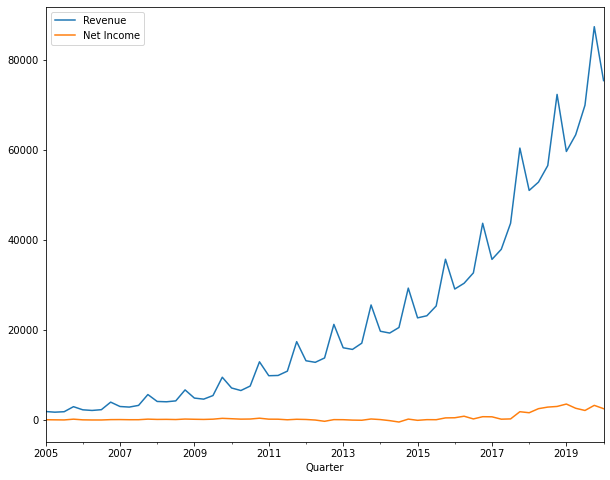

In [6]:
amazon_df=df.set_index("Quarter")
amazon_df.plot()

The decomposition of time series is a statistical task that deconstructs a time series into several components

**Trend component** - which reflects the long-term progression of the series - Trend can be positive or negative or both

**Seasonal Component** - includes cyclical component

**Noise or residual** - remainder of the time series after the other components have been removed

AR (Auto Regressive) and MA (Moving Average) model assumes time series to be stationary  and real-world data - they are often
governed by a (deterministic) trend and they might have (deterministic)
cyclical or seasonal components

# KPSS Test

Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.
If data is not stationary over mean, it can still be stationary over trend, i.e. mean is always lying on tend line

Null hypothesis - data is stationary<br>
Alternate hypothesis - data is not stationary

In [7]:
from statsmodels.tsa.stattools import kpss

In [8]:
# c - data is stationary around a constant
# ct - data is stationary around a trend
tstest = kpss(amazon_df['Revenue'], 'ct')
tstest
# As we can see there is an dictionary at end which gives us critical values for benchmarks
# Here our null hypothesis is - data is not stationary, and we need appropriate p value to reject the null hypothesis
# critical score is increasing, i.e. the less the critical score, the easier it will be to reject the null hypothesis
# we are getting our result as 0.1700, we can see the benchmark for 2.5% as 0.176, so as p value is even less than 2.5% we cant reject the null hypothesis
# This simply means that if data is stationary around trend, there is even less than 2.5% probability that we will get a dist like amazon revenue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"



(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

In [9]:
# Lets check our understanding with some synthetic data
# create synthetic data
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

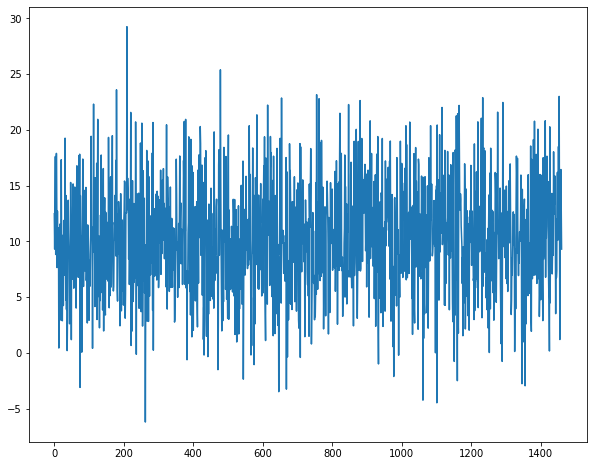

In [10]:
time = np.arange(4 * 365 + 1, dtype="float32") 
baseline = 10
slope = 0
noise_level = 5
series = baseline + trend(time, slope)
series += noise(time, noise_level, seed=42)
plt.plot(series)

In [11]:
tstest = kpss(series, 'c')
tstest
# Even though we have added noise, the critical value is almost near the 10% bench mark
# We can easily reject the null hypothesis and say that data is stationary around a constant (10 in our case)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.3449371021233946,
 0.1,
 24,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

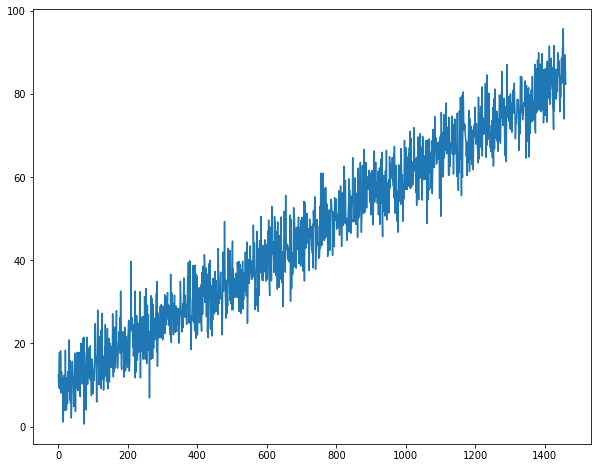

In [12]:
time = np.arange(4 * 365 + 1, dtype="float32") 
baseline = 10
slope = 0.05
noise_level = 5
series = baseline + trend(time, slope)
series += noise(time, noise_level, seed=42)
plt.plot(series)

In [13]:
tstest = kpss(series, 'c')
print(tstest)

(5.933404194064787, 0.01, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [14]:
# Even though the data we crfeated is not stationary around a constant
# When we run the test with ct parameter we realise that it is constant around trend
tstest = kpss(series, 'ct')
print(tstest)

(0.055256280316384916, 0.1, 24, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




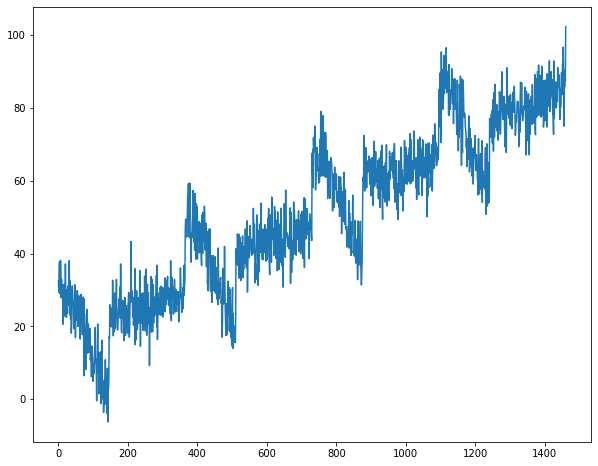

In [15]:
time = np.arange(4 * 365 + 1, dtype="float32") 
baseline = 10
slope = 0.05
amplitude = 20
noise_level = 5
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)
plt.plot(series)

In [16]:
tstest = kpss(series, 'ct')
print(tstest)
# Even when seasonality is added, data is still stationary around trend
# Note - This will not be the case when a higher factor of seasonality will be added.

(0.05037158018344811, 0.1, 24, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In the kpss test, first value is critical value, 2nd is p-value itself, i.e. we can directly refer to it to see that if we are crossing the threshold.



In [17]:
stats, p, lags, critical_values = kpss(amazon_df['Revenue'], 'ct')
print('Test Statistics: ',stats)
print('p-values: ', p)
print('Critical Values: ',critical_values)
if p<0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

Test Statistics:  0.170051682108309
p-values:  0.029956931576409152
Critical Values:  {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"



# ADF - adfuller


Null Hypothesis - Series possesses an unit root and hense is **Not Staionary**.<br>
Alternate Hypothesis - Series is Stationary.<br>
- Opposite of KPSS.

In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(amazon_df['Revenue'])
result

(-2.44483603819724,
 0.1294794312183859,
 10,
 50,
 {'1%': -3.568485864, '10%': -2.5986616, '5%': -2.92135992},
 753.7964652720992)

In [19]:
print('Test Statistics: ',result[0])
print('p-values: ', result[1])
print('Critical Values: ',result[4])
if result[1]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

Test Statistics:  -2.44483603819724
p-values:  0.1294794312183859
Critical Values:  {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is not Stationary


# Decomposition

**Decomposition**<br>
Additive - Trend + cyclic + seasonality + Noise (Residual)<br>
Multiplicative - Trend x cyclic x seasonality x Noise (Residual)<br>

While doing decomposition for non-stationary data, it is better to use multiplicative model, additive for stationary.<br>
multiplicative model is used when the seasonality increases or decreases with the level of time series.

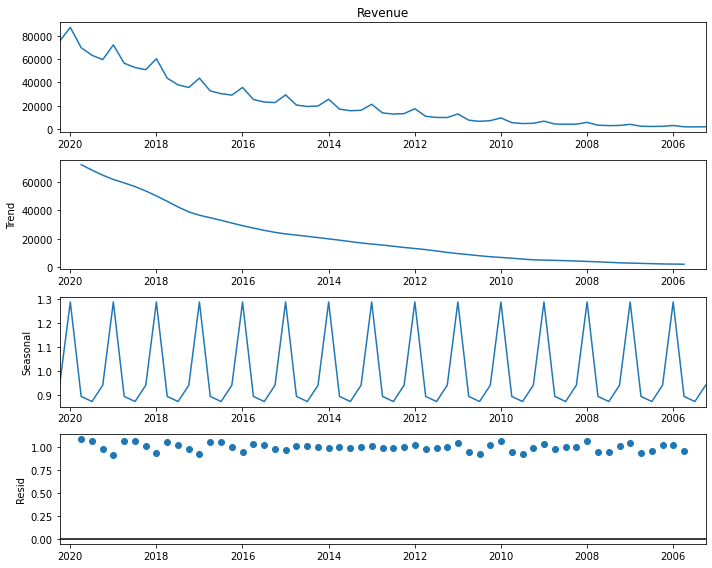

In [20]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model='multiplicative')

resplot = res.plot()

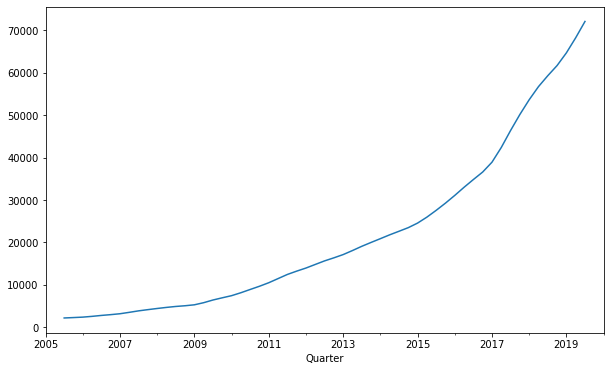

In [21]:
# For finding the trend model is doing t-1, t-2 analysis and hence we will not find data on first and last two points
plt.figure(figsize=(10,6))
res.trend.plot()

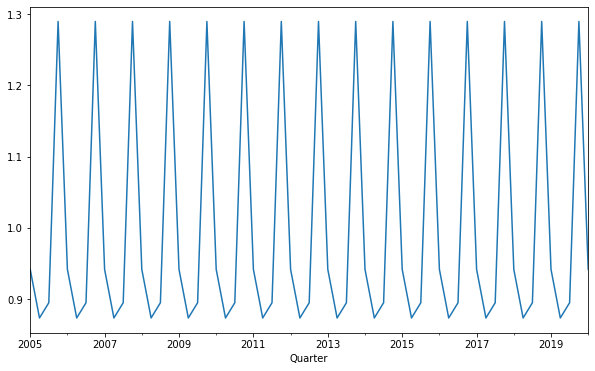

In [22]:
plt.figure(figsize=(10,6))
res.seasonal.plot()

In [23]:
print(res.observed[2])
res.trend[2]*res.seasonal[2]*res.resid[2]

69981.0


69980.99999999999

**What we need to do now**<br>
- All our AR and MA models works better with detrended data, i.e. data with trend removed from it.
- we can subtract the trend in case of additive model and divide the observed value with trend in case of additive model.
- Once modelling is complete and forecasting is done, we can fit a regression model to trend data and get the forecasted trend to add/ multiply with our forecasted data to match it with real time.(yet to learn)
<br><br><br>


- With non-stationary data we cant use the ARMA model, we will have to use the ARIMA model, where I takes care for the non-stationary(differentiating component)
- We pass 3 parameters to ARIMA (p,d,q) p for AR model, d for I and q for MA model.
- for data with seasionality, SARIMA model is used.





<Figure size 720x432 with 0 Axes>

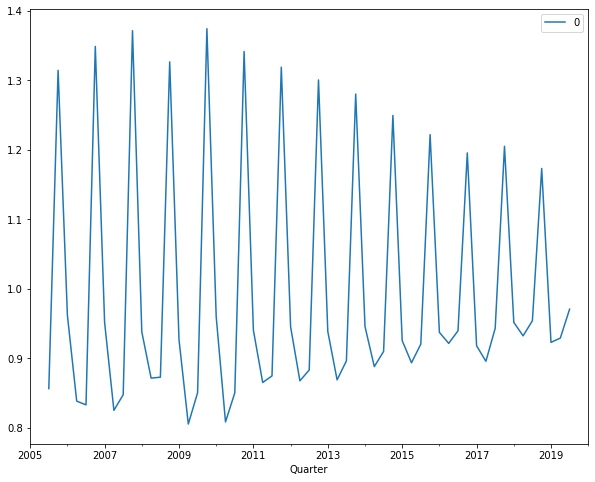

In [24]:
plt.figure(figsize=(10,6))
df = pd.DataFrame(res.observed/res.trend)
df.plot()

In [25]:
tstest = kpss(df.iloc[2:-2][0], 'c')
tstest
# yo! we cant reject null hypothesis...data is stationary...modelling is good to go!

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"



(0.45193604279379246,
 0.05476894707164119,
 11,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

# Differencing 
Setting the d parameter in ARIMA model (To make the time series stationary)

In [26]:
from pandas_datareader import data
import pmdarima as pm

In [27]:
start_date = '2010-11-21'
end_date = '2020-11-21'

# Stock price of Google over 10 years from Yahoo finance
google_df = data.DataReader('GOOG', 'yahoo', start_date, end_date)
google_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-22,295.611969,290.286926,292.638123,294.506134,4389592.0,294.506134
2010-11-23,293.405243,288.020416,292.408966,290.416443,4341412.0,290.416443
2010-11-24,297.186066,292.428894,292.558411,296.374115,4810765.0,296.374115
2010-11-26,295.382843,292.403992,294.127533,293.898407,2632029.0,293.898407
2010-11-29,293.798767,288.892151,293.484955,289.968140,5740838.0,289.968140
...,...,...,...,...,...,...
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800.0,1781.380005
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100.0,1770.150024
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500.0,1746.780029


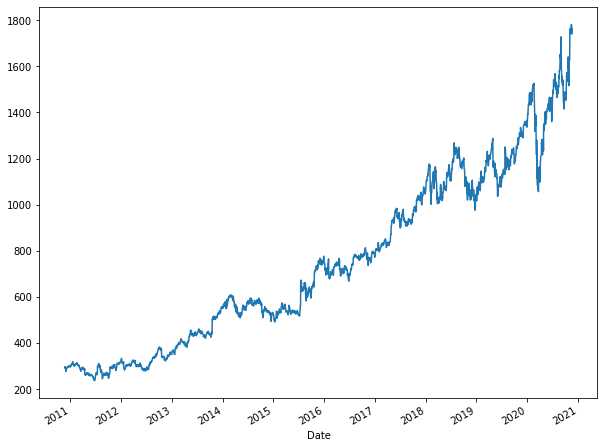

In [28]:
google_df['Close'].plot()

In [29]:
result = adfuller(google_df['Close'])

print('Test Statistics: ',result[0])
print('p-values: ', result[1])
print('Critical Values: ',result[4])
if result[1]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

Test Statistics:  0.8799813275776563
p-values:  0.9928234363554097
Critical Values:  {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}
Series is not Stationary


We apply multiple order of differencing (governed by d parameter)
- First ordered differencing : $y'_{t}$ = $y_{t}$ - $y_{t-1}$
- Second ordered differencing : $y''_{t}$ = ($y_{t}$ - $y_{t-1}$) - ($y_{t-1}$ - $y_{t-2}$)

we can get the perfect order (d) that will work with our data by using pmdarima

In [30]:
# Parameters passed are p value threshold, statistical test and maximum order till which you want to go
# Result from this function can directly be used as d value of ARIMA model
d = pm.arima.ndiffs(google_df['Close'], alpha=0.05, test='kpss', max_d=4)
d

1

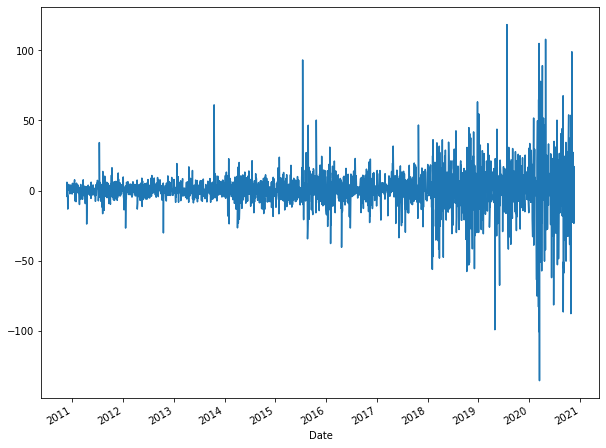

In [31]:
# Lets do the order 1 differencing and see if it needs differencing further
lag_google = google_df['Close'].rolling(window=2).apply(lambda x: x.iloc[1]-x.iloc[0]).dropna()
lag_google.plot()

In [32]:
pm.arima.ndiffs(lag_google, alpha=0.05, test='kpss', max_d=4)
# It doesn't needs further diffencing as non-stationarity is removed now

0

In [33]:
result = adfuller(lag_google)

print('Test Statistics: ',result[0])
print('p-values: ', result[1])
print('Critical Values: ',result[4])
if result[1]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

Test Statistics:  -9.987195057608373
p-values:  2.040638679601566e-17
Critical Values:  {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}
Series is stationary


End Note on seasonal Differencing
- To remove seasonality we will have to observe the data for seasonal period.
- i.e. for data with seasonality period of 12 months, $y_{t} - y_{t-12}$ will remove the seasonality, yet we will need to do further differencing to remove any remaining non-stationarity.
<br><br><br>
- for non-stationary data, we should use ARIMA model as ARMA model will expect us to manually create a stationary data by doing these differencing.
- Similarily for seasonality, we should use Seasonal ARIMA or SARIMA. 